# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [7]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [188]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())
data

{'items': [{'id': '74376536',
   'premium': False,
   'name': 'Data scientist',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Москва',
    'street': 'Походный проезд',
    'building': '14',
    'lat': 55.838091,
    'lng': 37.417167,
    'description': None,
    'raw': 'Москва, Походный проезд, 14',
    'metro': None,
    'metro_stations': [],
    'id': '953346'},
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2023-03-01T13:01:29+0300',
   'created_at': '2023-03-01T13:01:29+0300',
   'archived': False,
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
   'insider_interview': None,
   'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
   'adv_response

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [19]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [189]:
data['items']

[{'id': '74376536',
  'premium': False,
  'name': 'Data scientist',
  'department': None,
  'has_test': False,
  'response_letter_required': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': {'city': 'Москва',
   'street': 'Походный проезд',
   'building': '14',
   'lat': 55.838091,
   'lng': 37.417167,
   'description': None,
   'raw': 'Москва, Походный проезд, 14',
   'metro': None,
   'metro_stations': [],
   'id': '953346'},
  'response_url': None,
  'sort_point_distance': None,
  'published_at': '2023-03-01T13:01:29+0300',
  'created_at': '2023-03-01T13:01:29+0300',
  'archived': False,
  'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
  'insider_interview': None,
  'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
  'adv_response_url': None,
  'alternate_url': 'http

Сколько всего найдено вакансий

In [190]:
data['found']

261

Количество страниц в результатах поиска

In [22]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [24]:
df = pd.json_normalize(data['items'])

In [28]:
df

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,employer.logo_urls,department.id,department.name
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76925483,False,Data Scientist,NaN,False,False,None,None,2023-02-28T14:31:00+0300,2023-02-28T14:31:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,None,None,2023-03-01T15:00:20+0300,2023-03-01T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,77480809,False,Data Scientist/ML,NaN,False,False,None,None,2023-02-28T12:42:26+0300,2023-02-28T12:42:26+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-03-01T12:06:39+0300,2023-03-01T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,76810036,False,Data Scientist (Middle+),NaN,False,False,None,None,2023-03-02T12:36:01+0300,2023-03-02T12:36:01+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,77561611,False,Data Scientist (ML разработчик),NaN,False,False,None,None,2023-03-01T17:28:42+0300,2023-03-01T17:28:42+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,988387-988387-digital,Группа НЛМК ИТ и Диджитал
9,77536865,False,Data Scientist Junior/Junior+,NaN,False,False,None,None,2023-03-01T12:08:16+0300,2023-03-01T12:08:16+0300,...,Добрынинская,Кольцевая,5.36,5,55.728994,37.622533,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [29]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [30]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

Получаем данные через АПИшку

In [106]:
params = {
    'text':'Data Scientist',
    'area':1,
    'page':0,
    'per_page':100
}

def get_df_by_params(params):
    return (json.loads(requests.get('https://api.hh.ru/vacancies', params).content.decode()))

found_vac = get_df_by_params(params)['found']
found_vac

261

In [85]:
params.update({'text':'аналитик данных'})
get_df_by_params(params)['found']

6659

In [108]:
import math

In [109]:
class Errors_in_data(Exception):
    pass

max_per_page = 100

key_words = ['Data Scientist', 'аналитик данных', 'Data Analyst', 'Data аналитик']

all_data = []
for name in key_words:
    params.update({'text':name})
    params.update({'per_page':max_per_page})
    
    found_vac = get_df_by_params(params)['found']
    pages = math.ceil(found_vac/max_per_page)

    count_df = 0
    real_found_vac = 0
    for i in range(min(pages, 20)):
        params.update({'page':i})
        try:
            data_i = get_df_by_params(params)
            all_data.append(data_i)
            if 'errors' in data_i:
                raise Errors_in_data(str(data_i))
            real_found_vac += len(data_i['items'])
            count_df += 1
        except Errors_in_data as e:
            print('Что-то не то в get_df_by_params')
        except:
            print('Что-то не то в "for"')
        finally:
            print(f'Длина all_data:{len(all_data)}\r', end='')
        sleep(2)
    print(f'\nОбработано ключевое слово:{name}. Получено {count_df} датафреймов.\n',
            f'Количество обработанных вакансий:{real_found_vac}/{found_vac}.')

Длина all_data:1
Длина all_data:2
Длина all_data:3
Обработано ключевое слово:Data Scientist. Получено 3 датафреймов.
 Количество обработанных вакансий:261/261.
Длина all_data:4
Длина all_data:5
Длина all_data:6
Длина all_data:7
Длина all_data:8
Длина all_data:9
Длина all_data:10
Длина all_data:11
Длина all_data:12
Длина all_data:13
Длина all_data:14
Длина all_data:15
Длина all_data:16
Длина all_data:17
Длина all_data:18
Длина all_data:19
Длина all_data:20
Длина all_data:21
Длина all_data:22
Длина all_data:23
Обработано ключевое слово:аналитик данных. Получено 20 датафреймов.
 Количество обработанных вакансий:2000/6679.
Длина all_data:24
Длина all_data:25
Длина all_data:26
Длина all_data:27
Длина all_data:28
Длина all_data:29
Длина all_data:30
Длина all_data:31
Длина all_data:32
Длина all_data:33
Длина all_data:34
Длина all_data:35
Длина all_data:36
Длина all_data:37
Обработано ключевое слово:Data Analyst. Получено 14 датафреймов.
 Количество обработанных вакансий:1339/1339.
Длина all_d

На всякий случай дампнем все данные в отдельный json-файл

In [112]:
# with open('data_vacancy.json', 'w', encoding='utf-8') as f:
#     json.dump(all_data, f, ensure_ascii=False, indent=4)

# 51 датафрейм в data_vacancy.json

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [125]:
all_df = [pd.json_normalize(data['items']) for data in all_data]
len(all_df)

51

In [163]:
# vac_df.reset_index?
len(set(vac_df['id']))

3071

In [164]:
vac_df = pd.concat(all_df).reset_index(drop=True)
vac_df.drop_duplicates(subset='id', inplace=True)
vac_df.reset_index(drop=True, inplace=True)
vac_df

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,employer.logo_urls,department.id,department.name,insider_interview.id,insider_interview.url
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76925483,False,Data Scientist,NaN,False,False,None,None,2023-02-28T14:31:00+0300,2023-02-28T14:31:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN,NaN,NaN
4,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,76591950,False,Frontend Engineer (React Native),NaN,False,False,None,None,2023-02-03T12:51:46+0300,2023-02-03T12:51:46+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3067,76722984,False,Java Middle/Senior Developer,NaN,False,False,None,None,2023-02-07T15:12:15+0300,2023-02-07T15:12:15+0300,...,3.130,3,55.783096,37.719289,NaN,NaN,NaN,NaN,NaN,NaN
3068,76936334,False,Категорийный менеджер (DIY),NaN,False,False,None,None,2023-03-01T21:36:21+0300,2023-03-01T21:36:21+0300,...,7.139,7,55.709211,37.732117,NaN,NaN,NaN,NaN,NaN,NaN
3069,76931514,False,Категорийный менеджер/Лидер категории,NaN,False,False,None,None,2023-03-01T21:36:16+0300,2023-03-01T21:36:16+0300,...,7.139,7,55.709211,37.732117,NaN,NaN,NaN,NaN,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

Будем обращаться к АПИшке 3071 раз за новой вакансией. Поставим time.sleep(1.2), чтобы не забанили

In [175]:
all_descriptions_vac = []

ok = 0
for i in range(vac_df.shape[0]):
    try:
        vacancy = vac_df['id'].iloc[i]
        vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

        req = requests.get(vacancy_url)
        vacancy_info = json.loads(req.content.decode())
        all_descriptions_vac.append((i, vacancy_info))
        ok += 1
        print(f'Получено {ok}/{vac_df.shape[0]} вакансий. Длина списка = {len(all_descriptions_vac)}.', 
              f'Осталось примерно {(vac_df.shape[0]-ok)*1.25} секунд.                            ', end=' \r')
    except:
        print('\nЧто-то не то в "for"\n')
    finally:
        sleep(1.2)

In [176]:
len(all_descriptions_vac)

3071

Дампнем все данные о вакансиях в новый файл, чтобы не ждать потом в худшем случае час, чтобы получить данные снова

In [177]:
# with open('all_descriptions_vac.json', 'w', encoding='utf-8') as f:
#     json.dump(all_descriptions_vac, f, ensure_ascii=False, indent=4)

In [181]:
all_descriptions_vac_json = list(map(lambda x:x[1], all_descriptions_vac))

In [186]:
(all_descriptions_vac_json)[:1]

[{'id': '74376536',
  'premium': False,
  'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
  'relations': [],
  'name': 'Data scientist',
  'insider_interview': None,
  'response_letter_required': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': {'city': 'Москва',
   'street': 'Походный проезд',
   'building': '14',
   'lat': 55.838091,
   'lng': 37.417167,
   'description': None,
   'raw': 'Москва, Походный проезд, 14',
   'metro': None,
   'metro_stations': []},
  'allow_messages': True,
  'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
  'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
  'employment': {'id': 'full', 'name': 'Полная занятость'},
  'department': None,
  'contacts': None,
  'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию мо

Конвертируем JSON в pandas.DataFrame

In [191]:
vac_info_df = pd.json_normalize(all_descriptions_vac_json)

## "Причёсываем" полученную таблицу

In [192]:
vac_info_df.head()

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,department,contacts,description,...,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture.path,vacancy_constructor_template.bottom_picture.blurred_path,vacancy_constructor_template.bottom_picture,errors,request_id
0,74376536,False,[],Data scientist,NaN,False,True,NaN,NaN,<strong>Обязанности:</strong> <ul> <li>Работа ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,[],Data Scientist,NaN,False,True,NaN,NaN,<p>Привет! Наша аналитическая команда занимает...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76925483,False,[],Data Scientist,NaN,False,True,NaN,NaN,<p>Идеальный кандидат умеет использовать больш...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74257661,False,[],Data scientist,NaN,False,True,NaN,NaN,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77604691,False,[],Junior Data Scientist (отдел исследований и мо...,NaN,False,True,NaN,NaN,<p>В нашу команду исследований и моделирования...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
vac_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 100 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        3069 non-null   object 
 1   premium                                                   3069 non-null   object 
 2   relations                                                 3069 non-null   object 
 3   name                                                      3069 non-null   object 
 4   insider_interview                                         0 non-null      float64
 5   response_letter_required                                  3069 non-null   object 
 6   allow_messages                                            3069 non-null   object 
 7   department                                                0 non-null      float64
 8   contacts         

In [203]:
vac_info_df.describe()

,insider_interview,department,contacts,vacancy_constructor_template,negotiations_url,suitable_resumes_url,test,salary.from,salary.to,address.lat,...,address.metro.lat,address.metro.lng,salary,employer.logo_urls,vacancy_constructor_template.id,vacancy_constructor_template.top_picture.height,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,525.000000,415.000000,1434.000000,...,1189.000000,1189.000000,0.0,0.0,27.000000,27.000000,27.000000,18.000000,18.000000,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116694.133333,169151.703614,54.836012,...,55.757453,37.575169,NaN,NaN,28736.037037,596.259259,1637.740741,340.500000,744.888889,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70463.457978,110884.117392,6.963677,...,0.181991,0.306825,NaN,NaN,2567.203529,87.120426,239.927488,15.317234,33.496073,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,7.000000,0.000000,...,55.503370,30.333839,NaN,NaN,21758.000000,510.000000,1400.000000,320.000000,700.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.000000,90000.000000,55.726315,...,55.729542,37.539500,NaN,NaN,26809.000000,510.000000,1400.000000,320.000000,700.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.000000,150000.000000,55.748630,...,55.750243,37.593095,NaN,NaN,29960.000000,612.000000,1682.000000,352.000000,770.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.000000,235000.000000,55.780433,...,55.777439,37.638693,NaN,NaN,30567.000000,698.000000,1918.000000,352.000000,770.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.000000,600000.000000,61.790946,...,60.066990,37.926400,NaN,NaN,31043.000000,699.000000,1920.000000,352.000000,770.000000,NaN


In [204]:
vac_info_df.columns

Index(['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'allow_messages', 'department', 'contacts',
       'description', 'branded_description', 'vacancy_constructor_template',
       'key_skills', 'accept_handicapped', 'accept_kids', 'archived',
       'response_url', 'specializations', 'professional_roles', 'code',
       'hidden', 'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages', 'billing_type.id', 'billing_type.name',
       'area.id', 'area.name', 'area.url', 'salary.from', 'salary.to',
       'salary.currency', 'salary.gross', 'type.id', 'type.name',
       'address.city', 'address.street', 'address.building', 'address.lat'

**Создадим таблицу, в которой будут только нужные колонки**

In [600]:
need = [
        'id', 'name', 'description', 'key_skills',
        'alternate_url',
        'languages', 'area.name', 'salary.from', 'salary.to', 
        'salary.currency', 'salary.gross', 'address.lat', 'address.lng',
        'experience.name', 'employer.name'
       ]

In [601]:
len(need)

15

In [602]:
vac_good_df = vac_info_df.loc[:, need]
vac_good_df.isna().sum()

id                    2
name                  2
description           0
key_skills            2
alternate_url         2
languages             2
area.name             2
salary.from        2546
salary.to          2656
salary.currency    2409
salary.gross       2409
address.lat        1637
address.lng        1637
experience.name       2
employer.name         2
dtype: int64

В процессе обращения к АПИшке за данными, видимо, было получено 2 неверных ответа, так как столбец 'id' содержит 2 Nan'a. 

Удалим эти строчки из таблицы

In [603]:
vac_good_df.shape

(3071, 15)

In [604]:
vac_good_df.drop(labels=vac_good_df[vac_good_df.id.isna()].index, inplace=True, axis=0)

In [605]:
vac_good_df.isna().sum()

id                    0
name                  0
description           0
key_skills            0
alternate_url         0
languages             0
area.name             0
salary.from        2544
salary.to          2654
salary.currency    2407
salary.gross       2407
address.lat        1635
address.lng        1635
experience.name       0
employer.name         0
dtype: int64

**Осуществим one-hot кодирование для столбца требуемых языков**

In [606]:
vac_good_df = pd.concat([vac_good_df,
            vac_good_df.languages.apply(lambda x: [x[i]['name'] for i in range(len(x))] if len(x)>0 else 0) \
                     .str.join('|').str.get_dummies()
          ], axis=1).drop(columns=['languages'])
vac_good_df

,id,name,description,key_skills,alternate_url,area.name,salary.from,salary.to,salary.currency,salary.gross,address.lat,address.lng,experience.name,employer.name,Английский,Испанский,Немецкий,Русский,Французский
0,74376536,Data scientist,<strong>Обязанности:</strong> <ul> <li>Работа ...,"[{'name': 'Python'}, {'name': 'PyTorch'}, {'na...",https://hh.ru/vacancy/74376536,Москва,200000.0,240000.0,RUR,False,55.838091,37.417167,От 3 до 6 лет,Астор,0,0,0,0,0
1,77613664,Data Scientist,<p>Привет! Наша аналитическая команда занимает...,"[{'name': 'Python'}, {'name': 'ML'}, {'name': ...",https://hh.ru/vacancy/77613664,Москва,150000.0,200000.0,RUR,False,NaN,NaN,От 1 года до 3 лет,Retail Rocket,0,0,0,0,0
2,76925483,Data Scientist,<p>Идеальный кандидат умеет использовать больш...,[],https://hh.ru/vacancy/76925483,Москва,160000.0,200000.0,RUR,False,NaN,NaN,От 3 до 6 лет,7RedLines,1,0,0,0,0
3,74257661,Data scientist,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",https://hh.ru/vacancy/74257661,Москва,150000.0,300000.0,RUR,False,55.718035,37.502857,От 3 до 6 лет,НАО Финансовые системы,1,0,0,0,0
4,77604691,Junior Data Scientist (отдел исследований и мо...,<p>В нашу команду исследований и моделирования...,[],https://hh.ru/vacancy/77604691,Москва,NaN,NaN,NaN,NaN,55.784152,37.579205,Нет опыта,Банк Хоум Кредит,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,76591950,Frontend Engineer (React Native),"<p>Мы — стартап, разрабатывающий развлекательн...","[{'name': 'react native'}, {'name': 'Python'},...",https://hh.ru/vacancy/76591950,Москва,NaN,NaN,NaN,NaN,NaN,NaN,От 1 года до 3 лет,Botan Investments,0,0,0,0,0
3067,76722984,Java Middle/Senior Developer,<p>Группа компаний GOST («GOST GROUP») являетс...,[],https://hh.ru/vacancy/76722984,Москва,NaN,NaN,NaN,NaN,NaN,NaN,От 3 до 6 лет,GOST-group,0,0,0,0,0
3068,76936334,Категорийный менеджер (DIY),<p><strong>&quot;ВсеИнструменты.ру&quot; – кру...,"[{'name': 'Навыки переговоров'}, {'name': 'Вед...",https://hh.ru/vacancy/76936334,Москва,200000.0,500000.0,RUR,False,55.710905,37.719360,От 1 года до 3 лет,ВсеИнструменты.ру,0,0,0,0,0
3069,76931514,Категорийный менеджер/Лидер категории,<p><strong>&quot;ВсеИнструменты.ру&quot; – кру...,"[{'name': 'Навыки переговоров'}, {'name': 'Вед...",https://hh.ru/vacancy/76931514,Москва,200000.0,500000.0,RUR,False,55.710905,37.719360,От 1 года до 3 лет,ВсеИнструменты.ру,0,0,0,0,0


**Осуществим one-hot кодирование для key_skills**

In [607]:
vac_good_df.loc[:, 'key_skills'] = vac_good_df.key_skills \
                        .apply(lambda x: [x[i]['name'] for i in range(len(x))] if len(x) > 0 else 0)

In [608]:
vac_good_df = pd.concat([vac_good_df,
           vac_good_df['key_skills'].str.join('|').str.get_dummies()
          ], axis=1).drop(columns=['key_skills'])

In [609]:
vac_good_df.head()

,id,name,description,alternate_url,area.name,salary.from,salary.to,salary.currency,salary.gross,address.lat,...,усидчивость,устойчивое развитие,финансы,финтех,хранилища данных,хранилище данных,целевой маркетинг,чат-боты,шины данных,"эффективно управлять временем и людьми, находящимися в подчинении"
0,74376536,Data scientist,<strong>Обязанности:</strong> <ul> <li>Работа ...,https://hh.ru/vacancy/74376536,Москва,200000.0,240000.0,RUR,False,55.838091,...,0,0,0,0,0,0,0,0,0,0
1,77613664,Data Scientist,<p>Привет! Наша аналитическая команда занимает...,https://hh.ru/vacancy/77613664,Москва,150000.0,200000.0,RUR,False,NaN,...,0,0,0,0,0,0,0,0,0,0
2,76925483,Data Scientist,<p>Идеальный кандидат умеет использовать больш...,https://hh.ru/vacancy/76925483,Москва,160000.0,200000.0,RUR,False,NaN,...,0,0,0,0,0,0,0,0,0,0
3,74257661,Data scientist,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,https://hh.ru/vacancy/74257661,Москва,150000.0,300000.0,RUR,False,55.718035,...,0,0,0,0,0,0,0,0,0,0
4,77604691,Junior Data Scientist (отдел исследований и мо...,<p>В нашу команду исследований и моделирования...,https://hh.ru/vacancy/77604691,Москва,NaN,NaN,NaN,NaN,55.784152,...,0,0,0,0,0,0,0,0,0,0


**Перевод HTML-description в текстовые описания**

In [610]:
# !pip install html2text
import html2text

In [612]:
vac_good_df.loc[:, 'description'] = vac_good_df.description.apply(lambda x: html2text.html2text(x))
vac_good_df.columns[:10]

Index(['id', 'name', 'description', 'alternate_url', 'area.name',
       'salary.from', 'salary.to', 'salary.currency', 'salary.gross',
       'address.lat'],
      dtype='object')

**Перевод всех зарплат в рубли**

In [613]:
vac_good_df['salary.currency'] = vac_good_df['salary.currency'].fillna('RUR')
vac_good_df['salary.currency'].isna().sum()

0

In [614]:
vac_good_df['salary.currency'].unique()

array(['RUR', 'USD', 'EUR'], dtype=object)

Выведем одну строчку с валютой EUR и проследим, что она изменится

In [615]:
convert = {'RUR': 1, 'USD': 75.5, 'EUR': 79.98}

cols_to_convert = ['salary.from', 'salary.to']
vac_good_df.loc[116:118, cols_to_convert+['salary.currency']]

,salary.from,salary.to,salary.currency
116,NaN,NaN,RUR
117,NaN,8000.0,EUR
118,NaN,NaN,RUR


In [616]:
def convert_func(salary, currency):
    return salary * convert[currency]

vac_good_df.loc[:, cols_to_convert] = vac_good_df \
            .apply(lambda x: convert_func(x[cols_to_convert], x['salary.currency']), axis=1)

In [617]:
vac_good_df.loc[116:118, cols_to_convert+['salary.currency']]

,salary.from,salary.to,salary.currency
116,NaN,NaN,RUR
117,NaN,639840.0,EUR
118,NaN,NaN,RUR


Строчки изменились, всё прошло успешно

In [618]:
vac_good_df.drop(columns=['salary.currency'], inplace=True)

In [619]:
vac_good_df.reset_index(drop=True, inplace=True)

**Обработаем также колонку salary.gross.** 

* Заполним пропуски значением False. В основном это ни на что не повлияет. (True = зарплата до вычета 13% налога). 
* В тех строчках, где salary.gross=True вычтем 13% налога 
* Удалим колонку salary.gross.

In [623]:
vac_good_df['salary.gross'].unique()

array([False, nan, True], dtype=object)

In [624]:
vac_good_df['salary.gross'] = vac_good_df['salary.gross'].fillna(False)

In [625]:
vac_good_df['salary.gross'].unique()

array([False,  True])

Начальные данные, чтобы сверить в конце:

In [631]:
vac_good_df.loc[16:17, :]

,id,name,description,alternate_url,area.name,salary.from,salary.to,salary.gross,address.lat,address.lng,...,усидчивость,устойчивое развитие,финансы,финтех,хранилища данных,хранилище данных,целевой маркетинг,чат-боты,шины данных,"эффективно управлять временем и людьми, находящимися в подчинении"
16,77567000,Middle Data Scientist (Big Data),"**Кто мы:**\n\nОтдел занимается сбором, анализ...",https://hh.ru/vacancy/77567000,Москва,200000.0,250000.0,True,55.821573,37.498725,...,0,0,0,0,0,0,0,0,0,0
17,75546364,Эконометрист/Data scientist (Junior/Middle) в ...,Консалтинговая компания с 20-летним опытом раб...,https://hh.ru/vacancy/75546364,Москва,40000.0,NaN,False,55.769808,37.596192,...,0,0,0,0,0,0,0,0,0,0


In [632]:
cols_to_convert = ['salary.from', 'salary.to']
def gross_convert(salary, gross):
    return salary*0.87 if gross else salary

vac_good_df.loc[:, cols_to_convert] = vac_good_df \
            .apply(lambda x: gross_convert(x[cols_to_convert], x['salary.gross']), axis=1)

In [633]:
vac_good_df.loc[16:17, :]

,id,name,description,alternate_url,area.name,salary.from,salary.to,salary.gross,address.lat,address.lng,...,усидчивость,устойчивое развитие,финансы,финтех,хранилища данных,хранилище данных,целевой маркетинг,чат-боты,шины данных,"эффективно управлять временем и людьми, находящимися в подчинении"
16,77567000,Middle Data Scientist (Big Data),"**Кто мы:**\n\nОтдел занимается сбором, анализ...",https://hh.ru/vacancy/77567000,Москва,174000.0,217500.0,True,55.821573,37.498725,...,0,0,0,0,0,0,0,0,0,0
17,75546364,Эконометрист/Data scientist (Junior/Middle) в ...,Консалтинговая компания с 20-летним опытом раб...,https://hh.ru/vacancy/75546364,Москва,40000.0,NaN,False,55.769808,37.596192,...,0,0,0,0,0,0,0,0,0,0


Данные действительно изменились, теперь **удалим колонку 'salary.gross'**

In [634]:
vac_good_df.drop(columns=['salary.gross'], inplace=True)

**Удалим ненужные признаки**

In [635]:
vac_good_df.columns[:13]

Index(['id', 'name', 'description', 'alternate_url', 'area.name',
       'salary.from', 'salary.to', 'address.lat', 'address.lng',
       'experience.name', 'employer.name', 'Английский', 'Испанский'],
      dtype='object')

**Посмотрим, какие из навыков, полученных с помощью one-hot кодирования, встречаются условно меньше 10 раз и отбросим их, чтобы не загромождать таблицу, так как они не несут особой информативности. Для этого не будем учитывать следующие столбцы:**
* id
* name
* description
* alternate_url
* area.name
* experience.name
* employer.name
* salary.from
* salary.to
* address.lat
* address.lng

**Также не будем учитывать столбцы с различными языками:**
* Английский
* Испанский
* Немецкий
* Русский
* Французский
    

In [641]:
col_ignore = ['id', 'name', 'description', 'alternate_url','salary.from', 
              'salary.to', 'address.lat', 'address.lng', 'area.name', 'experience.name', 'employer.name',
              'Английский', 'Испанский', 'Немецкий', 'Русский', 'Французский']
len(col_ignore)

16

In [642]:
features_cols = [i for i in vac_good_df.columns if i not in col_ignore]
len(features_cols)

2052

In [643]:
feature_df = vac_good_df.loc[:, features_cols]
useful_features = feature_df.columns[feature_df.sum() > 10]
useful_features

Index(['1С: Предприятие 8', 'A/B тесты', 'ABC-анализ', 'API', 'Agile',
       'Agile Project Management', 'Airflow', 'Analytical skills',
       'Atlassian Confluence', 'Atlassian Jira',
       ...
       'Управление проектами', 'Управление товарными запасами',
       'Управленческая отчетность', 'Финансовая отчетность',
       'Финансовое планирование', 'Финансовый анализ', 'Ценообразование',
       'Экономический анализ', 'Яндекс.Директ', 'Яндекс.Метрика'],
      dtype='object', length=208)

**Количество навыков сократилось с 2052 до 208 навыков, которые имеют какую-то значимость**

Сохраним эту, начальную версию, с 2052 навыками в xlsx.

Очистим нашу таблицу от лишних навыков. Далее, конвертируем финальную версию в xlsx.

In [651]:
vac_good_df.to_excel('ds_vacancies.xlsx')

In [652]:
vac_really_good_df = vac_good_df.loc[:, col_ignore+list(useful_features)]

In [653]:
vac_really_good_df.head()

,id,name,description,alternate_url,salary.from,salary.to,address.lat,address.lng,area.name,experience.name,...,Управление проектами,Управление товарными запасами,Управленческая отчетность,Финансовая отчетность,Финансовое планирование,Финансовый анализ,Ценообразование,Экономический анализ,Яндекс.Директ,Яндекс.Метрика
0,74376536,Data scientist,**Обязанности:**\n\n * Работа в команде по со...,https://hh.ru/vacancy/74376536,200000.0,240000.0,55.838091,37.417167,Москва,От 3 до 6 лет,...,0,0,0,0,0,0,0,0,0,0
1,77613664,Data Scientist,Привет! Наша аналитическая команда занимается ...,https://hh.ru/vacancy/77613664,150000.0,200000.0,NaN,NaN,Москва,От 1 года до 3 лет,...,0,0,0,0,0,0,0,0,0,0
2,76925483,Data Scientist,Идеальный кандидат умеет использовать большие ...,https://hh.ru/vacancy/76925483,160000.0,200000.0,NaN,NaN,Москва,От 3 до 6 лет,...,0,0,0,0,0,0,0,0,0,0
3,74257661,Data scientist,**ОБЯЗАТЕЛЬНО: опыт разработки работающих реше...,https://hh.ru/vacancy/74257661,150000.0,300000.0,55.718035,37.502857,Москва,От 3 до 6 лет,...,0,0,0,0,0,0,0,0,0,0
4,77604691,Junior Data Scientist (отдел исследований и мо...,В нашу команду исследований и моделирования да...,https://hh.ru/vacancy/77604691,NaN,NaN,55.784152,37.579205,Москва,Нет опыта,...,0,0,0,0,0,0,0,0,0,0


**Таблица готова**

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [654]:
vac_really_good_df.to_excel('ds_vacancies_final.xlsx')

Таким образом, в полученной таблице **зарплата** указана в **рублях** и **net**. 

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [656]:
vac_really_good_df.shape[0]

3069

**Ответ:** В данный момент было получено **3069 различных вакансий** по запросам 'Data Scientist', 'аналитик данных', 'Data Analyst', 'Data аналитик'.

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [672]:
top_features = vac_really_good_df[useful_features].sum().sort_values(ascending=False)[:15]
top_features

SQL                                    1103
Python                                  660
Анализ данных                           536
Аналитическое мышление                  503
MS PowerPoint                           300
Английский язык                         223
Работа с большим объемом информации     210
MS SQL                                  209
MS Excel                                203
Power BI                                186
Бизнес-анализ                           184
Аналитика                               183
Аналитические исследования              179
BPMN                                    170
Базы данных                             161
dtype: int64

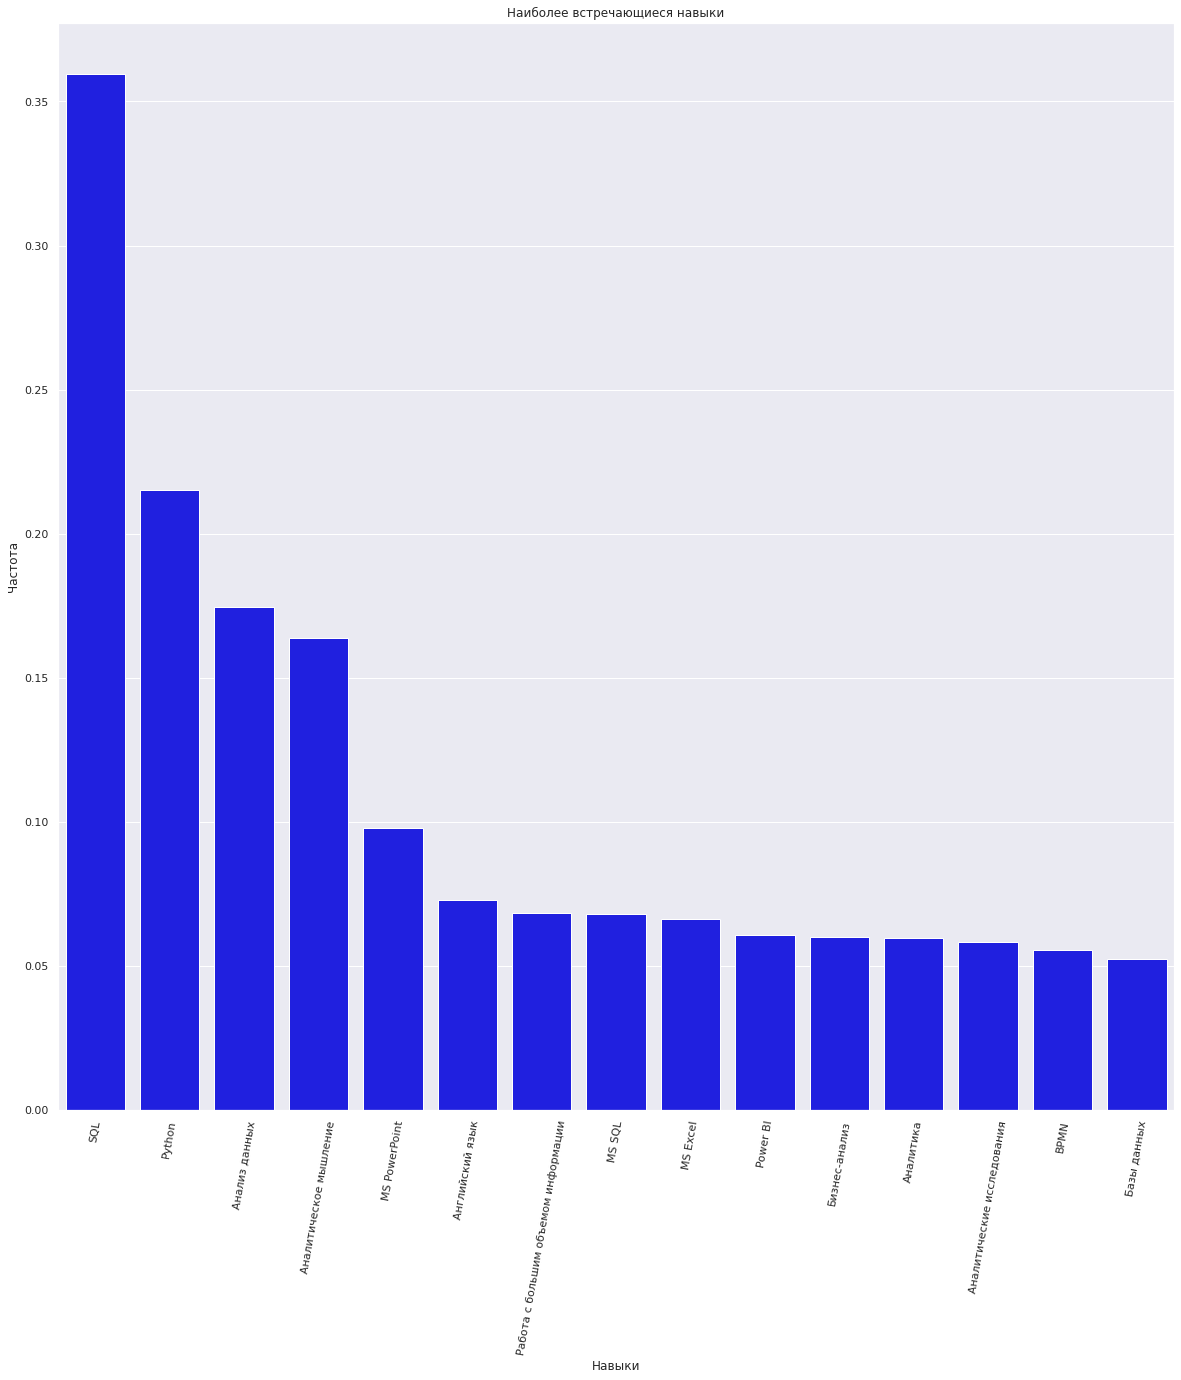

In [713]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(20, 20))
ax = sns.barplot(
    x=list(top_features.index), 
    y=top_features/3069,
#     data=cars, 
    color='blue',
    # estimator=sum,
    # estimator=np.median
)
# g = sns.catplot(x=list(top_features.index), y=top_features/3069, hue=list(top_features.index), bins=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
plt.xlabel('Навыки')
plt.ylabel('Частота')
plt.title('Наиболее встречающиеся навыки')
plt.show()

**Ответ:** самым популярным навыком, которым должен обладать Data Scientist, является SQL. За ним следуют по популярности Python, умение анализировать данные, аналитическое мышление, владение Ms PowerPoint. Дальше идут такие навыки, как MS SQL, MS Excel, Power BI и т.д. 

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [717]:
vac_really_good_df['experience.name'].unique()

array(['От 3 до 6 лет', 'От 1 года до 3 лет', 'Нет опыта', 'Более 6 лет'],
      dtype=object)

In [719]:
vac_really_good_df.loc[:, ['salary.from', 'salary.to']].describe()

,salary.from,salary.to
count,525.000000,415.000000
mean,118727.681333,172184.278542
std,66687.617270,110928.317959
min,50.000000,459.795000
25%,70000.000000,90000.000000
50%,100000.000000,147900.000000
75%,150000.000000,230000.000000
max,500000.000000,656850.000000


In [2]:
import matplotlib.ticker as ticker

**Построим гистограмму распределения нижней и верхней зарплатных вилок**

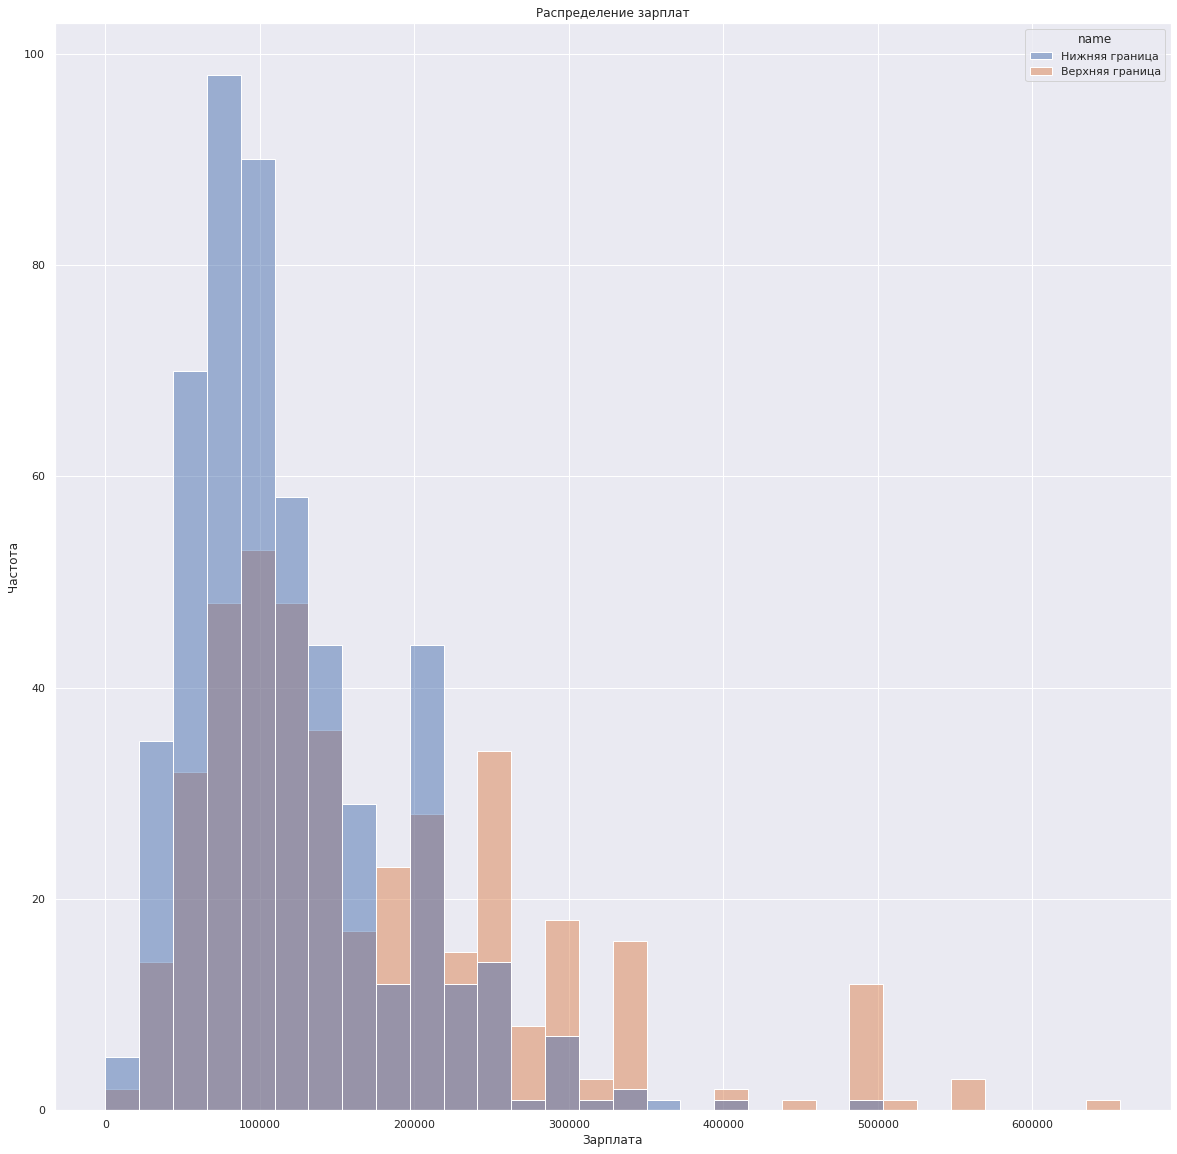

In [4]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(20, 20))

hist_df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': vac_really_good_df['salary.from'], 'name': 'Нижняя граница'}),
    pd.DataFrame.from_dict({'value': vac_really_good_df['salary.to'], 'name': 'Верхняя граница'})
])

f = sns.histplot(
    x='value', 
    data=hist_df, 
    hue='name',
    ax=ax
)

plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.title('Распределение зарплат')
plt.show()

**Для большей наглядности построим боксплоты зарплаты в зависимости от опыта**

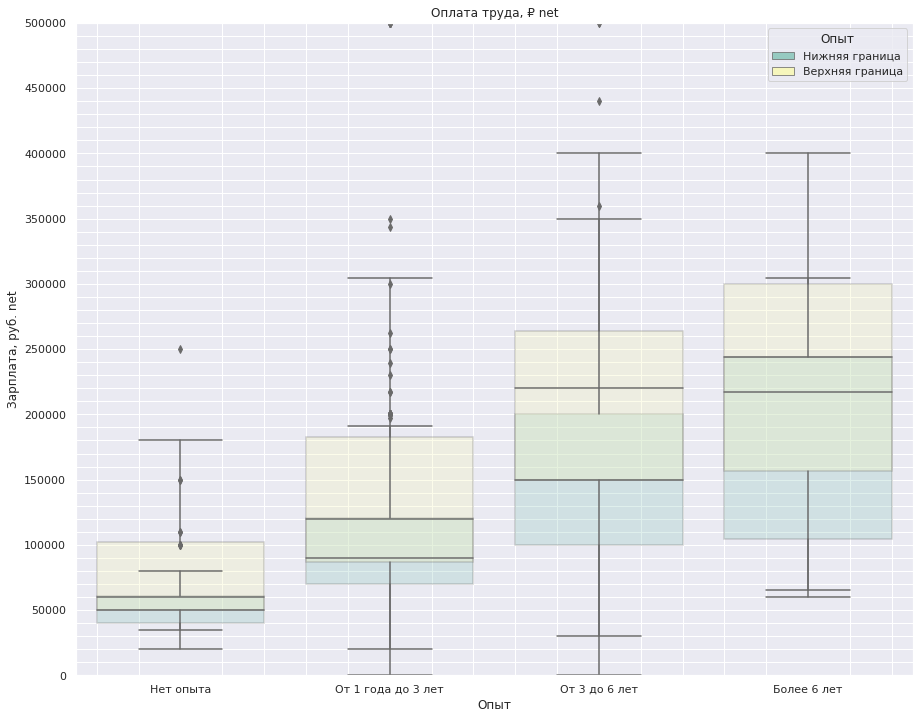

In [5]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15, 12))

hist_df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'x': vac_really_good_df['experience.name'], 'y':vac_really_good_df['salary.from'],
                            'name': 'Нижняя граница'}),
    pd.DataFrame.from_dict({'x': vac_really_good_df['experience.name'], 'y':vac_really_good_df['salary.to'], 
                            'name': 'Верхняя граница'})
])

f = sns.boxplot(x='x', y='y', data=hist_df, hue='name',
                order=['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
                palette='Set3', ax=ax, boxprops=dict(alpha=.3), dodge=False)

ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10000))
ax.minorticks_on()
ax.grid(which='minor',
        color = 'white',
        linewidth = 1)
ax.legend(title='Опыт')
plt.ylabel('Зарплата, руб. net')
plt.xlabel('Опыт')
plt.ylim((0,500000))
plt.title('Оплата труда, ₽ net')
plt.plot()
None

**Также проанализируем долю вакансий в зависимости от опыта**

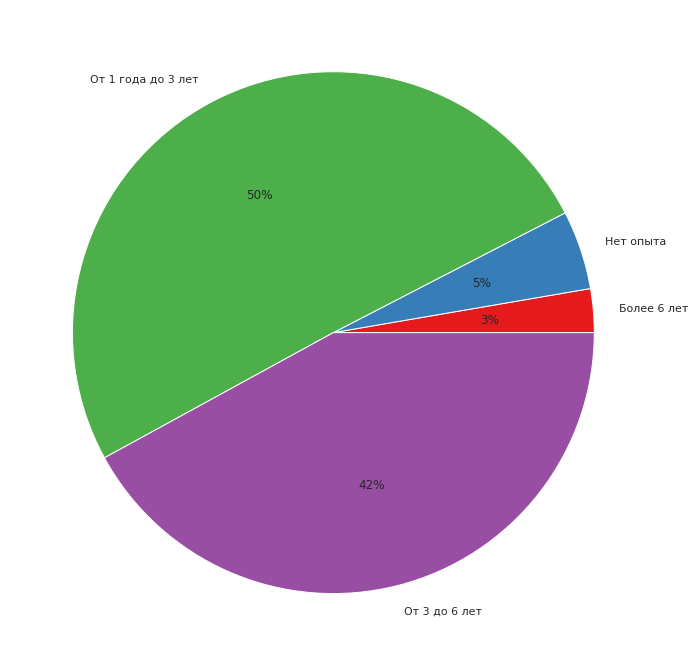

In [7]:
pie_data = vac_really_good_df.groupby(by='experience.name').count()['id']
colors = sns.color_palette('Set1')[0:5]

fig, ax = plt.subplots(figsize=(15, 12))
plt.pie(pie_data, labels=list(pie_data.index), colors = colors, autopct='%.0f%%')

plt.show()
None

**Ответ:** на рынке вакансий Москвы по специальности "Аналитик данных" больше всего позиций для людей с опытом от 1 года до 3 лет и от 3 до 6 лет. Вакансий для джунов всего 5%. Медианные зарплаты (руб. net):
* для людей без опыта: 50-60K
* для людей с опытом 1-3 года: 90-120K
* для людей с опытом 3-6 лет: 150-220K
* для людей с опытом более 6 лет: 220-240K

Также, большинство работодателей предлагают нижнюю границу $\approx$ 100K

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

**Проанализируем ситуацию с вакансиями python-разработчика в Санкт-Петербурге. Получим данные и распарсим их.**

In [10]:
import math

In [13]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "python-разработчик",
    'area': 2, # Санкт-Петербург
    'page': 0,
    'per_page': 100
}
def get_df_by_params(params):
    return (json.loads(requests.get('https://api.hh.ru/vacancies', params).content.decode()))


class Errors_in_data(Exception):
    pass

max_per_page = 100

key_words = ['python-разработчик', 'python программист', 'python developer', 'python dev', 'Питон разработчик',
             'python junior', 'python middle', 'python senior', 'python team', 'python lead',
             'phyton-разработчик', 'phyton-программист', 'phyton developer', 'phyton dev',
             'phyton junior', 'phyton middle', 'phyton senior', 'phyton team', 'phyton lead'
            ]

all_data_python = []
for name in key_words:
    params.update({'text':name})
    params.update({'per_page':max_per_page})
    
    found_vac = get_df_by_params(params)['found']
    pages = math.ceil(found_vac/max_per_page)

    count_df = 0
    real_found_vac = 0
    for i in range(min(pages, 20)):
        params.update({'page':i})
        try:
            data_i = get_df_by_params(params)
            all_data_python.append(data_i)
            if 'errors' in data_i:
                raise Errors_in_data(str(data_i))
            try:
                real_found_vac += len(data_i['items'])
                count_df += 1
            except:
                raise Errors_in_data(str(data_i))

        except Errors_in_data as e:
            print('Что-то не то в get_df_by_params')
        except:
            print('Что-то не то в "for"')
        finally:
            print(f'Длина all_data:{len(all_data_python)}\r', end='')
        sleep(1.2)
    print(f'\nОбработано ключевое слово:{name}. Получено {count_df} датафреймов.\n',
            f'Количество обработанных вакансий:{real_found_vac}/{found_vac}.\n')
with open('python_vacancy.json', 'w', encoding='utf-8') as f:
    json.dump(all_data_python, f, ensure_ascii=False, indent=4)
all_df_python = [pd.json_normalize(data['items']) for data in all_data_python]
len(all_df_python)
vac_df = pd.concat(all_df_python).reset_index(drop=True)
vac_df.drop_duplicates(subset='id', inplace=True)
vac_df.reset_index(drop=True, inplace=True)

all_descriptions_vac = []

ok = 0
print('\n')
for i in range(vac_df.shape[0]):
    try:
        vacancy = vac_df['id'].iloc[i]
        vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

        req = requests.get(vacancy_url)
        vacancy_info = json.loads(req.content.decode())
        all_descriptions_vac.append((i, vacancy_info))
        ok += 1
        print(f'Получено {ok}/{vac_df.shape[0]} вакансий. Длина списка = {len(all_descriptions_vac)}.', 
              f'Осталось примерно {(vac_df.shape[0]-ok)*1.25} секунд.                            ', end=' \r')
    except:
        print('\nЧто-то не то в "for"\n')
    finally:
        sleep(1.2)
with open('all_descriptions_vac_python.json', 'w', encoding='utf-8') as f:
    json.dump(all_descriptions_vac, f, ensure_ascii=False, indent=4)
all_descriptions_vac_json = list(map(lambda x:x[1], all_descriptions_vac))
vac_info_df = pd.json_normalize(all_descriptions_vac_json)
vac_info_df.to_excel('pandas_vacs_python.xlsx')

Длина all_data:2
Обработано ключевое слово:python-разработчик. Получено 2 датафреймов.
 Количество обработанных вакансий:159/159.

Длина all_data:9
Обработано ключевое слово:python программист. Получено 7 датафреймов.
 Количество обработанных вакансий:683/683.

Длина all_data:20
Обработано ключевое слово:python developer. Получено 11 датафреймов.
 Количество обработанных вакансий:1077/1077.

Длина all_data:21
Обработано ключевое слово:python dev. Получено 1 датафреймов.
 Количество обработанных вакансий:22/22.

Длина all_data:22
Обработано ключевое слово:Питон разработчик. Получено 1 датафреймов.
 Количество обработанных вакансий:2/2.

Длина all_data:23
Обработано ключевое слово:python junior. Получено 1 датафреймов.
 Количество обработанных вакансий:37/37.

Длина all_data:24
Обработано ключевое слово:python middle. Получено 1 датафреймов.
 Количество обработанных вакансий:95/95.

Длина all_data:29
Обработано ключевое слово:python senior. Получено 5 датафреймов.
 Количество обработанны

**Обработка полученных данных**

In [16]:
need = [
        'id', 'name', 'description', 'key_skills',
        'alternate_url',
        'languages', 'area.name', 'salary.from', 'salary.to', 
        'salary.currency', 'salary.gross', 'address.lat', 'address.lng',
        'experience.name', 'employer.name'
       ]
vac_good_df = vac_info_df.loc[:, need]
vac_good_df.isna().sum()
vac_good_df.drop(labels=vac_good_df[vac_good_df.id.isna()].index, inplace=True, axis=0)

# ------------------------- one-hot languages  ----------------------------------------
vac_good_df = pd.concat([vac_good_df,
            vac_good_df.languages.apply(lambda x: [x[i]['name'] for i in range(len(x))] if len(x)>0 else 0) \
                     .str.join('|').str.get_dummies()
          ], axis=1).drop(columns=['languages'])

# -------------------------- one-hot key_skills ---------------------------------------
vac_good_df.loc[:, 'key_skills'] = vac_good_df.key_skills \
                        .apply(lambda x: [x[i]['name'] for i in range(len(x))] if len(x) > 0 else 0)
vac_good_df = pd.concat([vac_good_df,
           vac_good_df['key_skills'].str.join('|').str.get_dummies()
          ], axis=1).drop(columns=['key_skills'])

# -------------------------- html descriptions to text --------------------------------
import html2text
vac_good_df.loc[:, 'description'] = vac_good_df.description.apply(lambda x: html2text.html2text(x))

# -------------------------- Перевод зарплат в рубли ----------------------------------
vac_good_df['salary.currency'] = vac_good_df['salary.currency'].fillna('RUR')
convert = {'RUR': 1, 'USD': 75.5, 'EUR': 79.98}

cols_to_convert = ['salary.from', 'salary.to']
def convert_func(salary, currency):
    return salary * convert[currency]

vac_good_df.loc[:, cols_to_convert] = vac_good_df \
            .apply(lambda x: convert_func(x[cols_to_convert], x['salary.currency']), axis=1)
vac_good_df.drop(columns=['salary.currency'], inplace=True)
vac_good_df.reset_index(drop=True, inplace=True)

# -------------------------- Обработка gross/net --------------------------------------
vac_good_df['salary.gross'] = vac_good_df['salary.gross'].fillna(False)
cols_to_convert = ['salary.from', 'salary.to']
def gross_convert(salary, gross):
    return salary*0.87 if gross else salary

vac_good_df.loc[:, cols_to_convert] = vac_good_df \
            .apply(lambda x: gross_convert(x[cols_to_convert], x['salary.gross']), axis=1)
vac_good_df.drop(columns=['salary.gross'], inplace=True)

# -------------------------- Удаление лишних features ---------------------------------
col_ignore = ['id', 'name', 'description', 'alternate_url','salary.from', 
              'salary.to', 'address.lat', 'address.lng', 'area.name', 'experience.name', 'employer.name']
features_cols = [i for i in vac_good_df.columns if i not in col_ignore]
feature_df = vac_good_df.loc[:, features_cols]
useful_features = feature_df.columns[feature_df.sum() > 10]

# --------------- Сохранение таблиц со всеми features и только с полезными ------------
vac_good_df.to_excel('python_vacancies_begin.xlsx')
vac_really_good_df = vac_good_df.loc[:, col_ignore+list(useful_features)]
vac_really_good_df.to_excel('python_vacancies_final.xlsx')

Не забывайте про выводы.

**Посмотрим какие навыки чаще всего встречаются в вакансиях python-разработчиков**

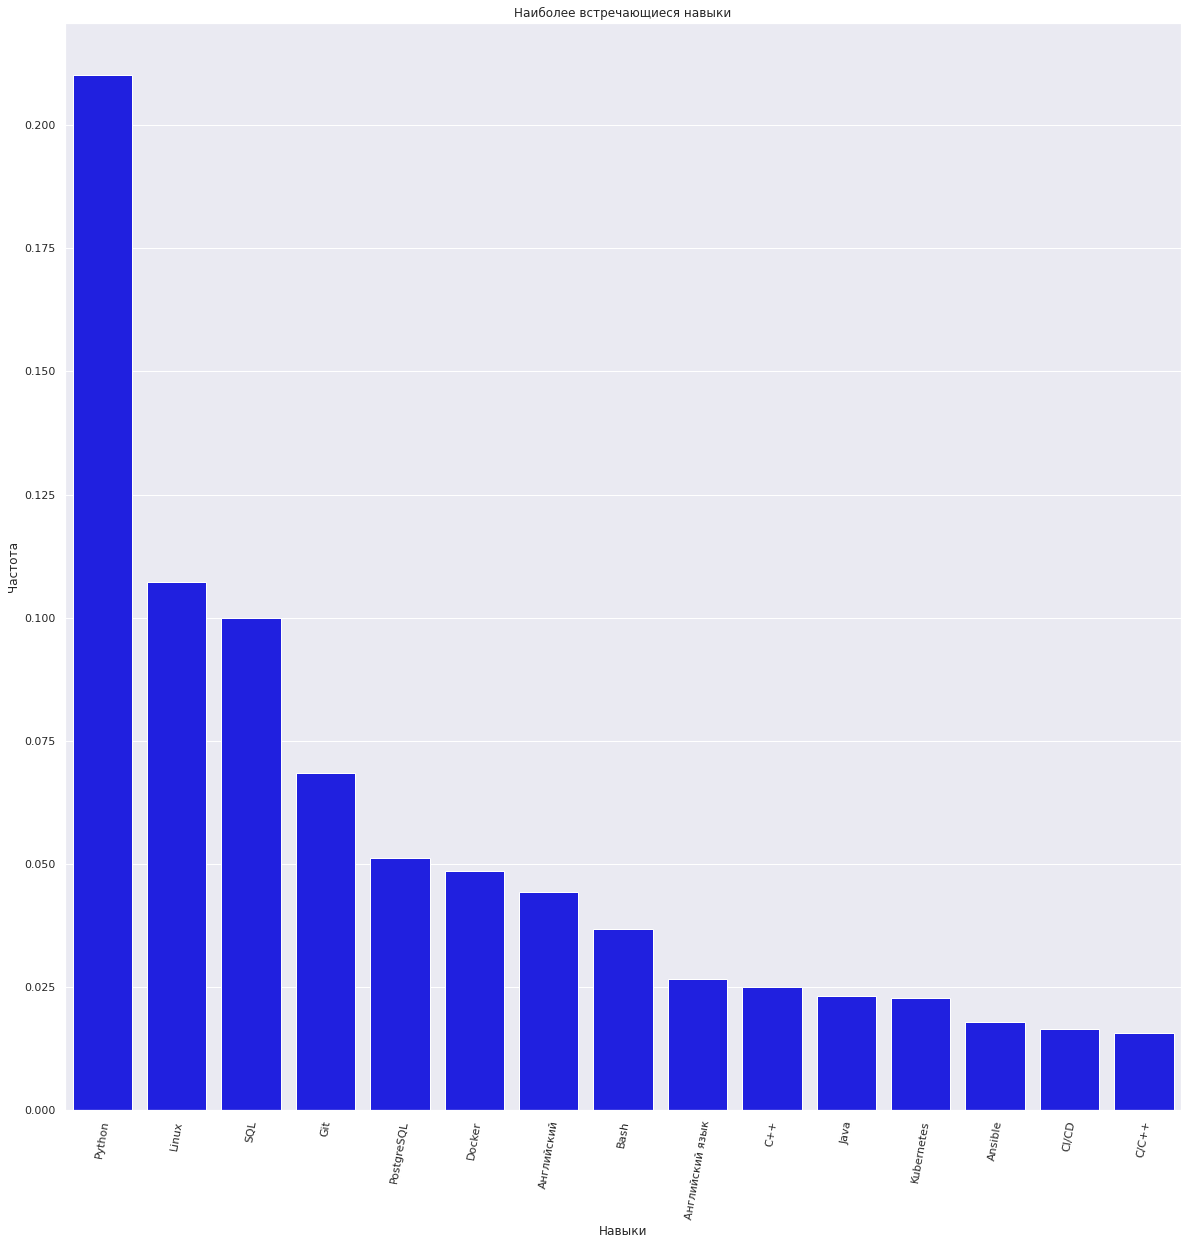

In [17]:
top_features = vac_really_good_df[useful_features].sum().sort_values(ascending=False)[:15]
sns.set(style="darkgrid")

fig = plt.figure(figsize=(20, 20))
ax = sns.barplot(
    x=list(top_features.index), 
    y=top_features/3069,
    color='blue',
)

ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
plt.xlabel('Навыки')
plt.ylabel('Частота')
plt.title('Наиболее встречающиеся навыки')
plt.show()

**Вывод:** базовыми навыками для python-разработчика являются знание python, знание устройства linux; знания SQL (в том числе PostgreSQL), Git, Docker. 

**Посмотрим, какую зарплату готовы платить работодатели**

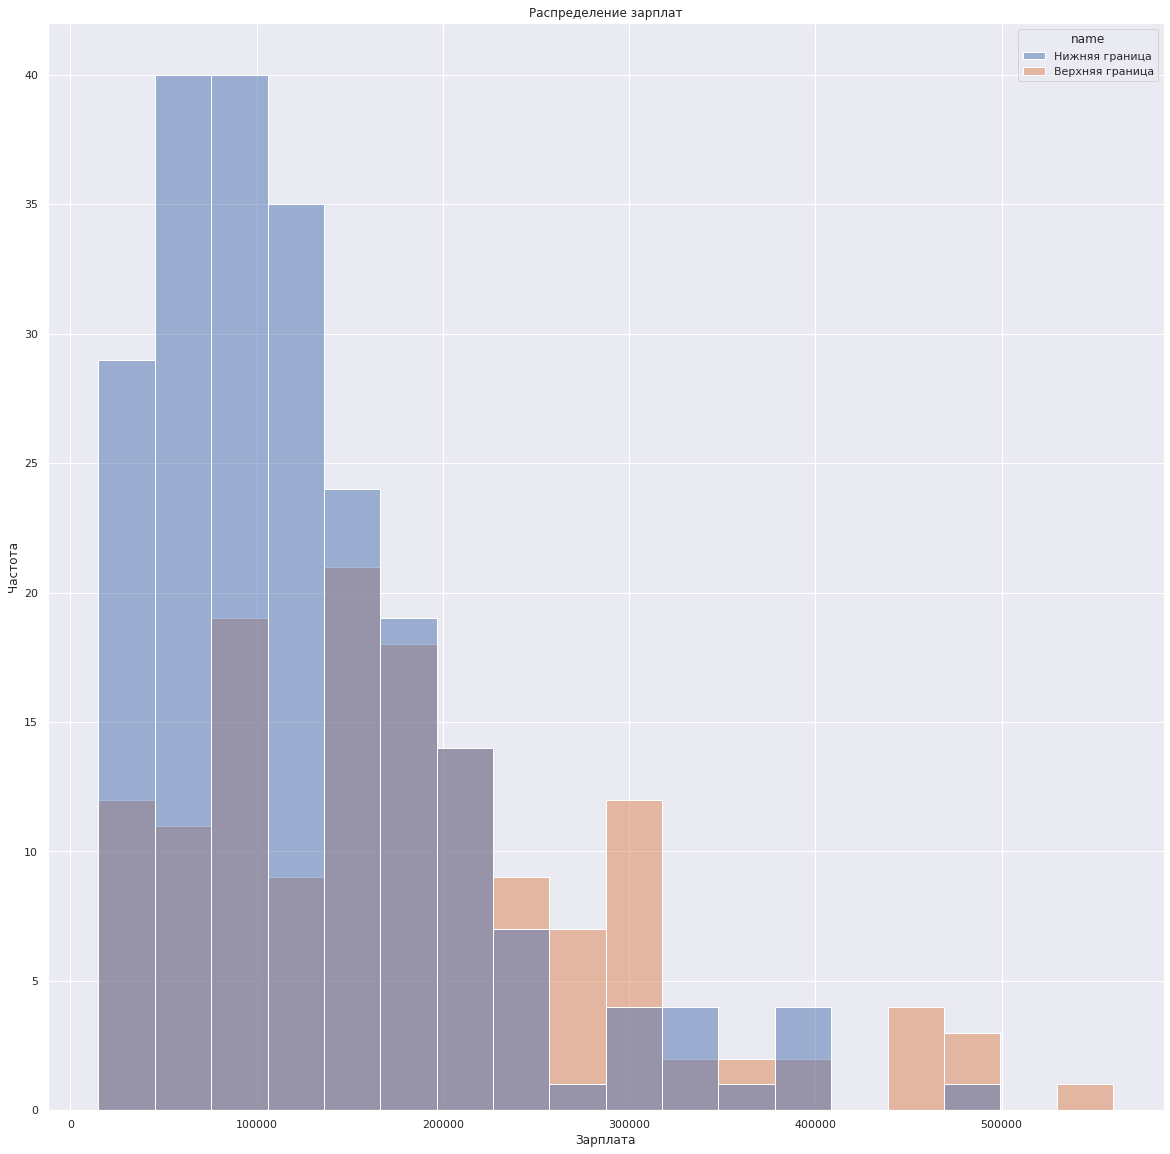

In [44]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(20, 20))

hist_df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': vac_really_good_df['salary.from'], 'name': 'Нижняя граница'}),
    pd.DataFrame.from_dict({'value': vac_really_good_df['salary.to'], 'name': 'Верхняя граница'})
])

f = sns.histplot(
    x='value', 
    data=hist_df, 
    hue='name',
    ax=ax
)

plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.title('Распределение зарплат')
plt.show()

**Вывод**: большинство работодателей предлагают нижнюю границу $\approx$ 100K рублей net так же, как и по специальности Data Scientist в Москве. Но отличается количество вакансий с более высокой зарплатой.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе?
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


### Проанализируем важность опыта для python-разработчика

**Посмотрим, какую зарплату работодатели готовы платить в зависимости от опыта**

Визуализируем нижнюю и верхнюю границы зарплат

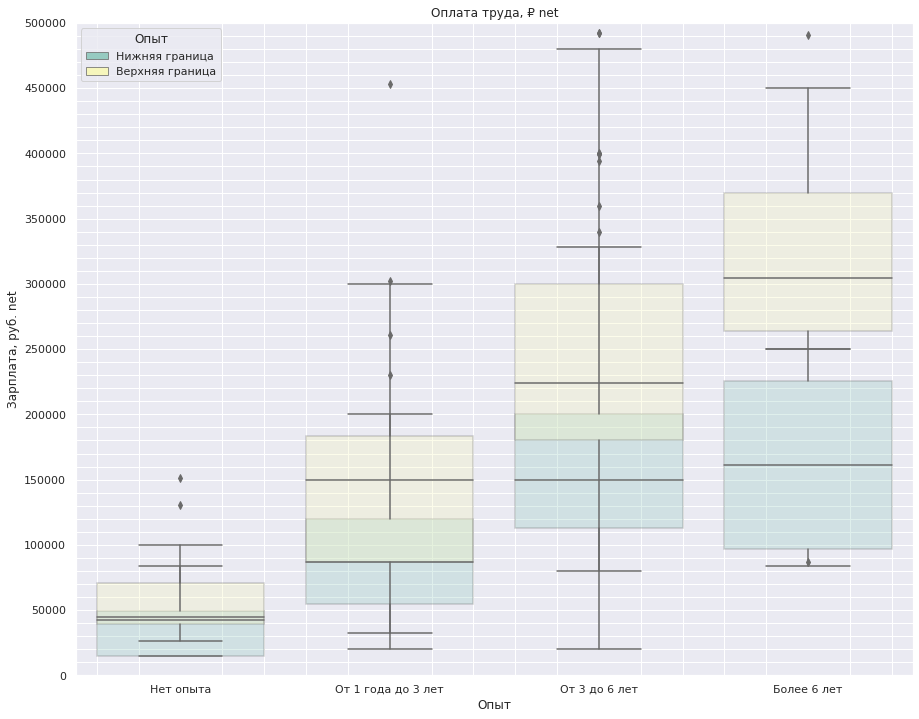

In [52]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15, 12))

hist_df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'x': vac_really_good_df['experience.name'], 'y':vac_really_good_df['salary.from'],
                            'name': 'Нижняя граница'}),
    pd.DataFrame.from_dict({'x': vac_really_good_df['experience.name'], 'y':vac_really_good_df['salary.to'], 
                            'name': 'Верхняя граница'})
])

f = sns.boxplot(x='x', y='y', data=hist_df, hue='name',
                order=['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
                palette='Set3', ax=ax, boxprops=dict(alpha=.3), dodge=False)

ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10000))
ax.minorticks_on()
ax.grid(which='minor',
        color = 'white',
        linewidth = 1)
ax.legend(title='Опыт')
plt.ylabel('Зарплата, руб. net')
plt.xlabel('Опыт')
plt.ylim((0,500000))
plt.title('Оплата труда, ₽ net')
plt.plot()
None

**Посмотрим, какой опыт требуют работодатели**

In [62]:
pie_data = vac_really_good_df.groupby(by='experience.name').count()['id']

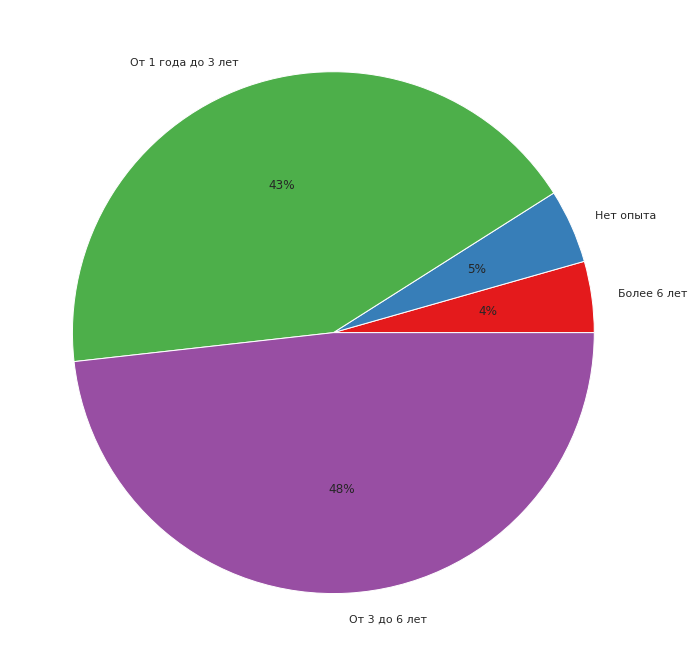

In [99]:
colors = sns.color_palette('Set1')[0:5]


fig, ax = plt.subplots(figsize=(15, 12))
plt.pie(pie_data, labels=list(pie_data.index), colors = colors, autopct='%.0f%%')



plt.show()
None

**Ответ:** на рынке вакансий Санкт-Петербурга по специальности "python-разработчик" больше всего позиций для людей с опытом от 1 года до 3 лет и от 3 до 6 лет. Вакансий для джунов всего 5%. Медианные зарплаты (руб. net):
* для людей без опыта: 45К
* для людей с опытом 1-3 года: 90-150K
* для людей с опытом 3-6 лет: 150-220K
* для людей с опытом более 6 лет: 160-300K

Также, большинство работодателей предлагают нижнюю границу $\approx$ 100K

### Посмотрим на топ работодателей

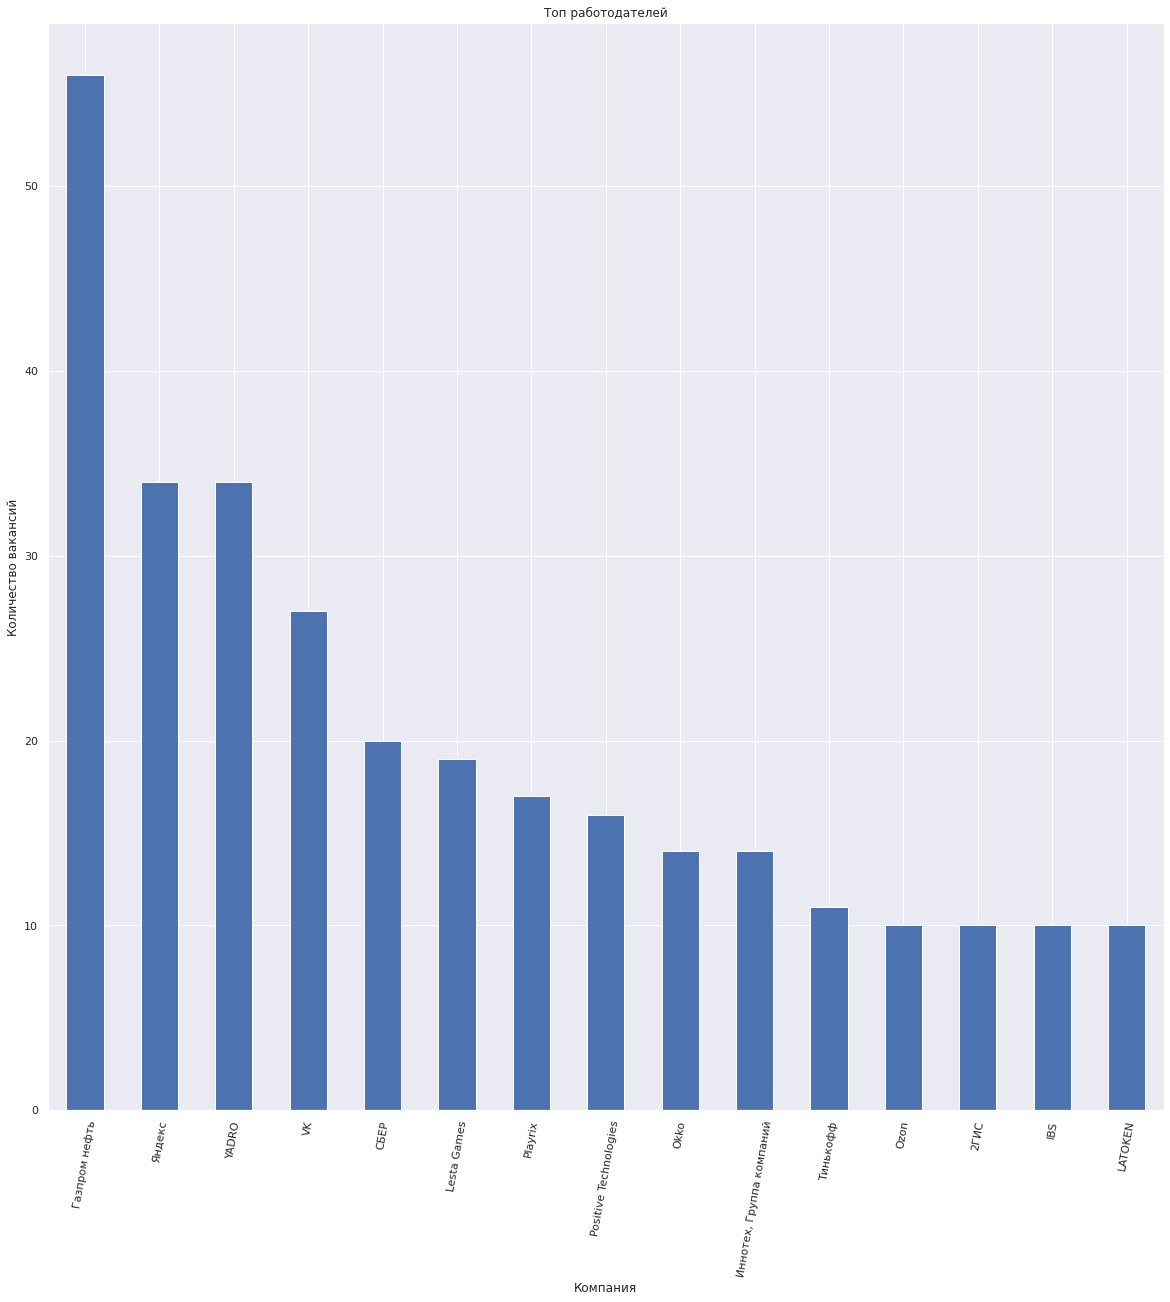

In [100]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(20, 20))

f = vac_really_good_df['employer.name'].value_counts() \
        .sort_values(ascending=False)[:15].plot(kind='bar')

ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
plt.xlabel('Компания')
plt.ylabel('Количество вакансий')
plt.title('Топ работодателей')
plt.show()

**Самыми популярными работодателями** являются Газпром нефть, Яндекс, YADRO, VK, СБЕР

### Посмотрим, в каком районе Санкт-Петербурга данная вакансия пользуется наибольшим и наименьшим спросом

In [5]:
map_df = pd.DataFrame(data=list(zip(vac_really_good_df['address.lat'], 
                                    vac_really_good_df['address.lng'])), 
                      columns=['latitude', 'longitude'])
cell_joined_df = map_df.apply(lambda x: np.round(x*4, decimals=1)*0.25 
                                                  if x.name in ('latitude', 'longitude') else x)
fig = px.density_mapbox(cell_joined_df, lat='latitude', lon='longitude',
                     mapbox_style="stamen-terrain",
                     zoom=9, opacity=1, radius=5, center={'lat':59.94, 'lon':30.31})
fig.show()

**Видим, что** в центре Петербурга плотность вакансий больше, на окраинах - меньше

Какие выводы можно сделать из построенных графиков?

**Таким образом** медианные зарплаты Data Scientist'a в Москве и Python-разработчика в Петербурге примерно одинаковы. Зато отличаются верхние квартили. Data Scientist'ам с опытом до 3 лет по верхним квартилям предлагают вакансии с зарплатой больше, чем Python-разработчикам; 
с опытом больше 3 лет - наоборот.

Ситуация на рынке вакансий примерно одинаковая. Доля джуновских вакансий в обоих специальностях 5%, вакансии же для людей, с опытом 1-6 лет, лидируют.